### 1. Đọc dữ liệu và xử lý cơ bản

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('./Data/Gold_Futures_Cleaned.csv')

# Chuyển cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])

# Đặt cột Date làm index (tùy thuộc vào nhu cầu)
data.set_index('Date', inplace=True)

# Xem qua dữ liệu
print(data.head())

             Price    Open    High     Low      Vol.
Date                                                
2010-01-04  1118.3  1099.0  1124.6  1093.8  155480.0
2010-01-05  1118.7  1122.0  1129.6  1115.5  156410.0
2010-01-06  1136.5  1118.5  1141.0  1116.8  176900.0
2010-01-07  1133.7  1139.0  1139.5  1128.7  121150.0
2010-01-08  1138.9  1131.5  1140.0  1119.5  212620.0


### 2. Kiểm tra mối quan hệ phi tuyến tính (Mutual Information)
Giải thích: Mutual Information (MI) kiểm tra mức độ liên hệ giữa Price và các cột khác, kể cả khi mối liên hệ đó không tuyến tính.

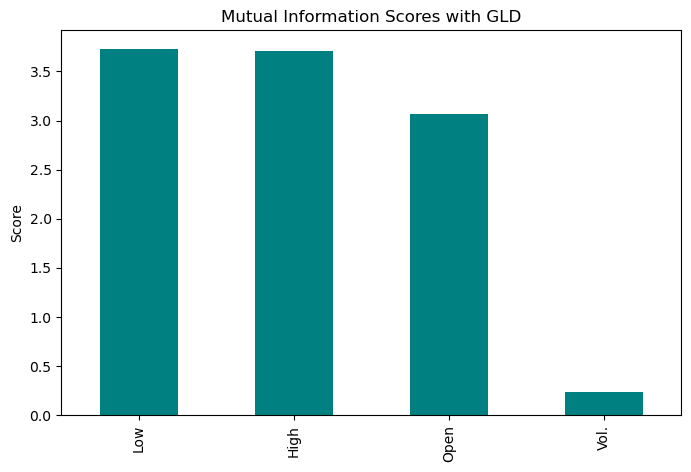

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Chọn biến đầu vào và mục tiêu
X = data[['Open', 'High', 'Low', 'Vol.']]
y = data['Price']

# Tính Mutual Information
mi_scores = mutual_info_regression(X, y)

# Hiển thị kết quả
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores.sort_values(ascending=False, inplace=True)

# Vẽ biểu đồ Mutual Information
plt.figure(figsize=(8, 5))
mi_scores.plot(kind='bar', color='teal')
plt.title('Mutual Information Scores with Price')
plt.ylabel('Score')
plt.show()

Giá trị MI cao cho biết biến có ảnh hưởng lớn đến GLD.

### 3. Vẽ biểu đồ GLD theo thời gian

<Figure size 2250x900 with 0 Axes>

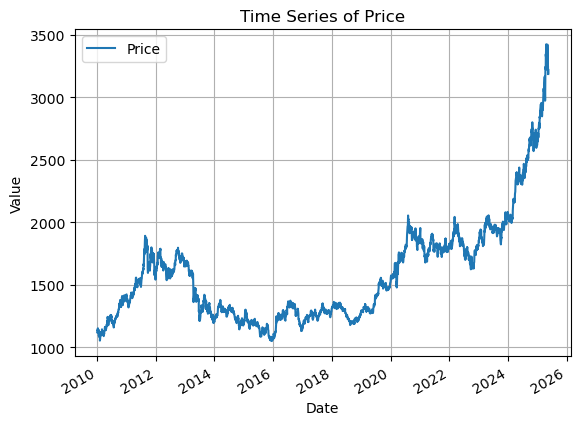

In [ ]:
# Vẽ biểu đồ thời gian của Price
plt.figure(figsize=(15, 6), dpi=150)
data[['Price']].plot()
plt.title('Time Series of Price')
plt.ylabel('Value')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### 4. Thống kê giá vàng trung bình, giá vàng tối đa và giá vàng tối thiểu theo năm

In [7]:
import pandas as pd

# Đọc dữ liệu từ file CSV
data = pd.read_csv('./Data/Gold_Futures_Cleaned.csv')

# Chuyển cột Date thành định dạng datetime
data['Date'] = pd.to_datetime(data['Date'])

# Thêm cột "Year" từ cột Date
data['Year'] = data['Date'].dt.year

# Nhóm dữ liệu theo năm và tính toán thống kê
stats_by_year = data.groupby('Year')['Price'].agg(['mean', 'median', 'max', 'min'])
print("Thống kê theo năm:")
print(stats_by_year)

Thống kê theo năm:
             mean   median     max     min
Year                                      
2010  1228.338889  1214.80  1421.4  1052.8
2011  1573.286508  1545.20  1891.9  1318.4
2012  1670.522619  1664.35  1796.5  1536.6
2013  1408.770518  1370.80  1693.2  1193.6
2014  1266.273016  1274.05  1379.0  1142.6
2015  1158.782540  1166.15  1300.7  1049.6
2016  1251.649206  1258.10  1372.6  1073.6
2017  1260.623529  1262.60  1351.2  1162.0
2018  1269.202713  1265.55  1362.9  1177.1
2019  1394.598450  1409.60  1555.9  1270.6
2020  1774.347104  1784.80  2054.6  1477.9
2021  1798.724419  1793.65  1954.4  1678.0
2022  1801.903488  1803.35  2043.3  1623.6
2023  1947.238132  1949.60  2083.5  1809.2
2024  2393.067059  2385.50  2800.8  1994.7
2025  3011.334043  2954.65  3425.3  2647.4


### 5. Biều đồ giá vàng trung bình theo năm

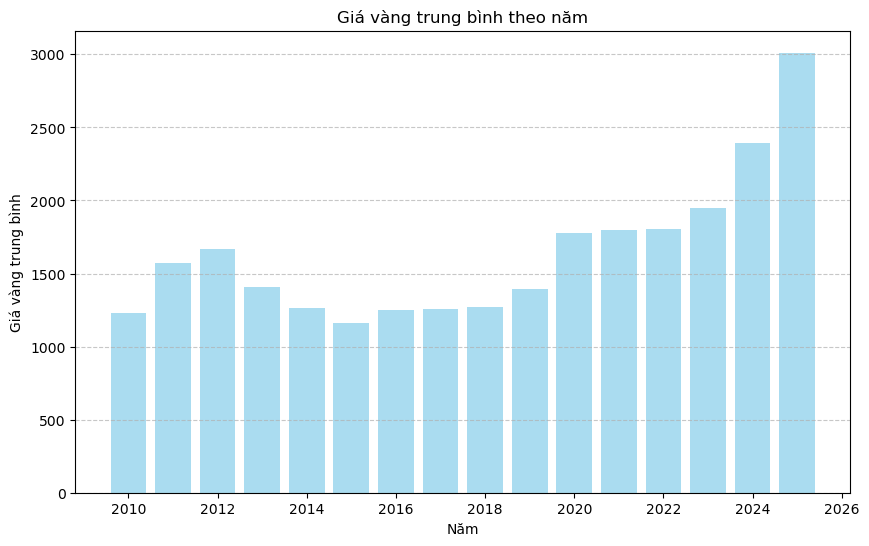

In [8]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ giá vàng trung bình qua các năm
plt.figure(figsize=(10, 6))
plt.bar(stats_by_year.index, stats_by_year['mean'], color='skyblue', alpha=0.7)
plt.title('Giá vàng trung bình theo năm')
plt.xlabel('Năm')
plt.ylabel('Giá vàng trung bình')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 6. Thống kê xu hướng giá vàng theo các ngày trong tuần

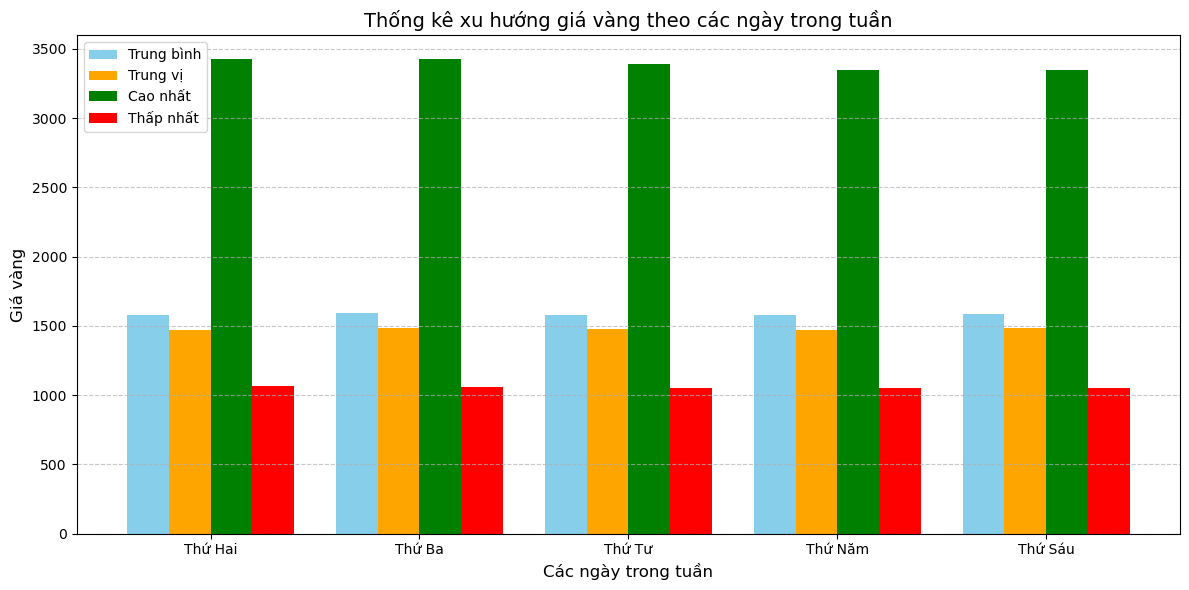

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc lại dữ liệu
data = pd.read_csv('./Data/Gold_Futures_Cleaned.csv')  # Thay bằng đường dẫn file của bạn

# Chuyển cột 'Date' sang datetime và tạo cột 'Day_of_Week'
data['Date'] = pd.to_datetime(data['Date'])
data['Day_of_Week'] = data['Date'].dt.day_name()

# Tính các thống kê theo ngày trong tuần
stats_by_day = data.groupby('Day_of_Week')['Price'].agg(['mean', 'median', 'max', 'min'])

# Đảm bảo thứ tự các ngày trong tuần
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
stats_by_day = stats_by_day.reindex(day_order)

# Việt hóa nhãn các ngày trong tuần
day_labels_vn = ['Thứ Hai', 'Thứ Ba', 'Thứ Tư', 'Thứ Năm', 'Thứ Sáu']

# Vẽ biểu đồ nhóm cột
x = np.arange(len(day_order))  # Vị trí của các ngày trong tuần
width = 0.2  # Độ rộng của mỗi nhóm cột

plt.figure(figsize=(12, 6))
plt.bar(x - width * 1.5, stats_by_day['mean'], width, label='Trung bình', color='skyblue')
plt.bar(x - width * 0.5, stats_by_day['median'], width, label='Trung vị', color='orange')
plt.bar(x + width * 0.5, stats_by_day['max'], width, label='Cao nhất', color='green')
plt.bar(x + width * 1.5, stats_by_day['min'], width, label='Thấp nhất', color='red')

# Gắn nhãn và thêm thông tin
plt.title('Thống kê xu hướng giá vàng theo các ngày trong tuần', fontsize=14)
plt.xlabel('Các ngày trong tuần', fontsize=12)
plt.ylabel('Giá vàng', fontsize=12)
plt.xticks(x, day_labels_vn)  # Sử dụng nhãn tiếng Việt
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 7. Thống kê so sánh giá vàng trong trong khảng thời gian khác nhau (boxplot)

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.'], dtype='object')


<Figure size 1200x800 with 0 Axes>

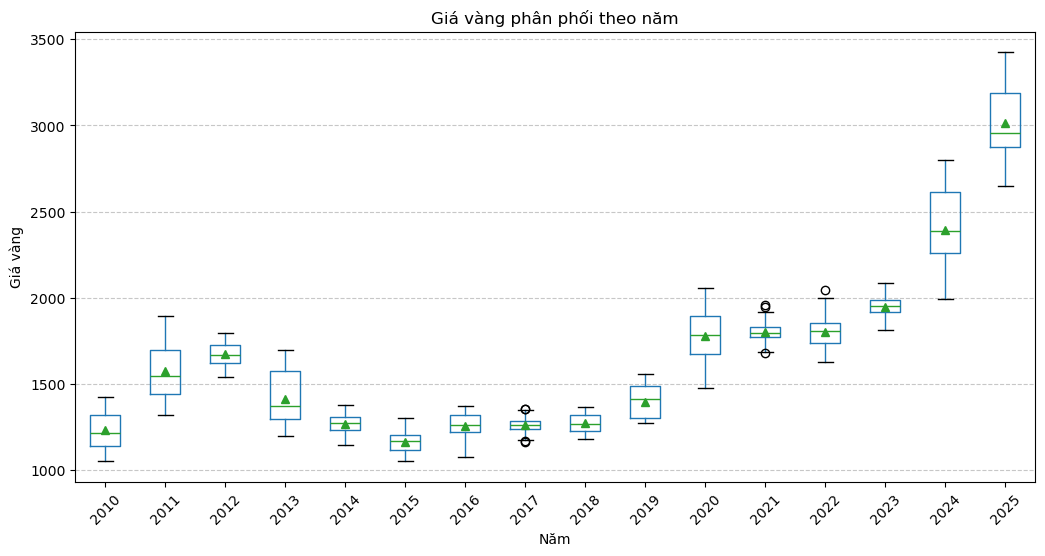

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load lại file bằng pandas, ví dụ:
gld_price_data = pd.read_csv('./Data/Gold_Futures_Cleaned.csv')

# Kiểm tra các cột trong dữ liệu để đảm bảo có cột 'Date'
print(gld_price_data.columns)

# Nếu cột 'Date' tồn tại, ta sẽ tạo thêm cột 'Year' từ cột 'Date'
gld_price_data['Year'] = pd.to_datetime(gld_price_data['Date']).dt.year

# Vẽ boxplot so sánh giá vàng theo năm
plt.figure(figsize=(12, 8))
gld_price_data.boxplot(column='Price', by='Year', grid=False, figsize=(12, 6), showmeans=True)
plt.title('Giá vàng phân phối theo năm')
plt.suptitle('')  # Xóa tiêu đề mặc định của pandas boxplot
plt.xlabel('Năm')
plt.ylabel('Giá vàng')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

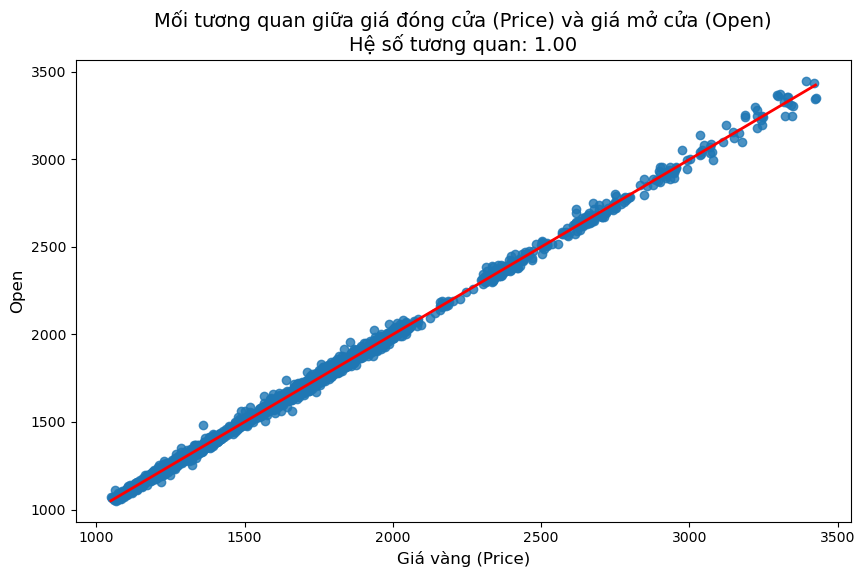

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính hệ số tương quan giữa giá vàng (Price) và Open
correlation = gld_price_data['Price'].corr(gld_price_data['Open'])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.regplot(x='Price', y='Open', data=gld_price_data, 
            line_kws={'color': 'red', 'lw': 2},
            ci=None)  # Không hiển thị khoảng tin cậy

# Thêm tiêu đề và nhãn trục
plt.title(f'Mối tương quan giữa giá đóng cửa (Price) và giá mở cửa (Open)\nHệ số tương quan: {correlation:.2f}', fontsize=14)
plt.xlabel('Giá vàng (Price)', fontsize=12)
plt.ylabel('Open', fontsize=12)

# Hiển thị biểu đồ
plt.show()

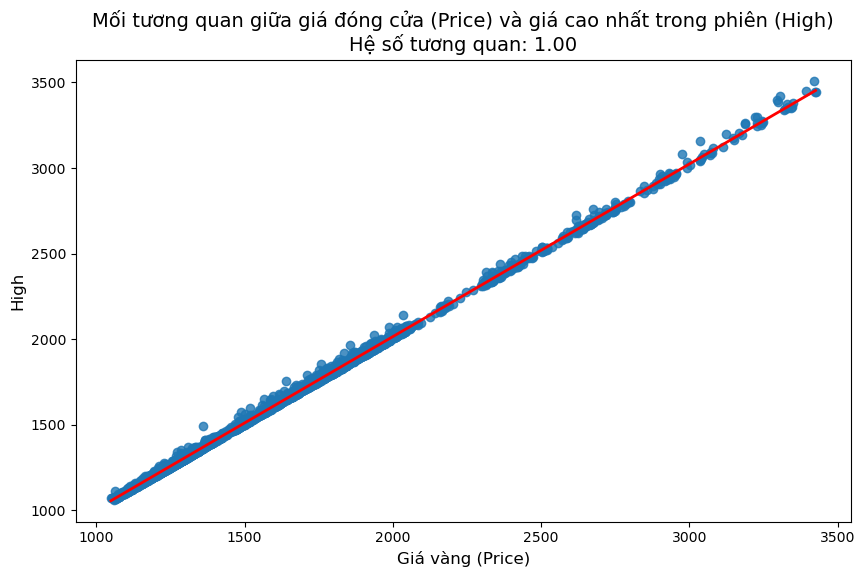

In [6]:
# Tính hệ số tương quan giữa giá vàng (Price) và USO
correlation = gld_price_data['Price'].corr(gld_price_data['High'])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.regplot(x='Price', y='High', data=gld_price_data, 
            line_kws={'color': 'red', 'lw': 2},
            ci=None)  # Không hiển thị khoảng tin cậy

# Thêm tiêu đề và nhãn trục
plt.title(f'Mối tương quan giữa giá đóng cửa (Price) và giá cao nhất trong phiên (High)\nHệ số tương quan: {correlation:.2f}', fontsize=14)
plt.xlabel('Giá vàng (Price)', fontsize=12)
plt.ylabel('High', fontsize=12)

# Hiển thị biểu đồ
plt.show()

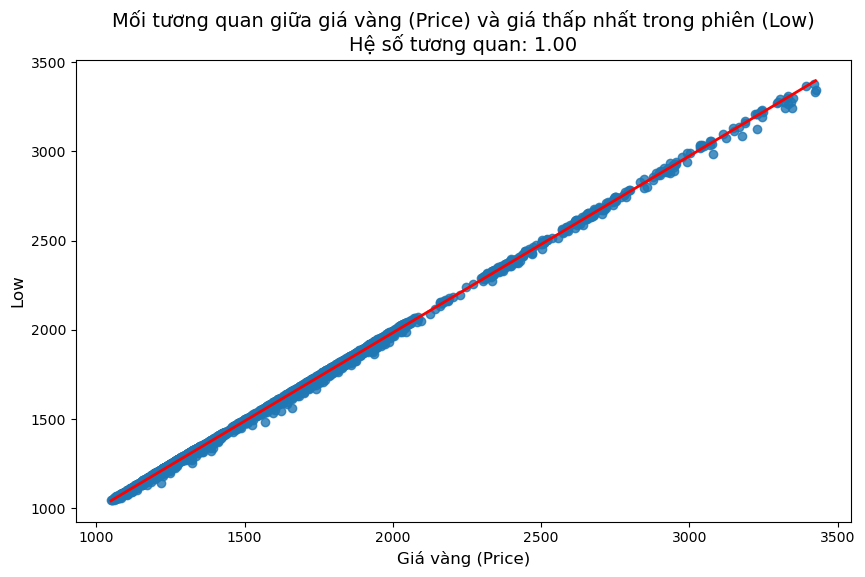

In [7]:
# Tính hệ số tương quan giữa giá vàng (Price) và Low
correlation = gld_price_data['Price'].corr(gld_price_data['Low'])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.regplot(x='Price', y='Low', data=gld_price_data, 
            line_kws={'color': 'red', 'lw': 2},
            ci=None)  # Không hiển thị khoảng tin cậy

# Thêm tiêu đề và nhãn trục
plt.title(f'Mối tương quan giữa giá vàng (Price) và giá thấp nhất trong phiên (Low)\nHệ số tương quan: {correlation:.2f}', fontsize=14)
plt.xlabel('Giá vàng (Price)', fontsize=12)
plt.ylabel('Low', fontsize=12)

# Hiển thị biểu đồ
plt.show()

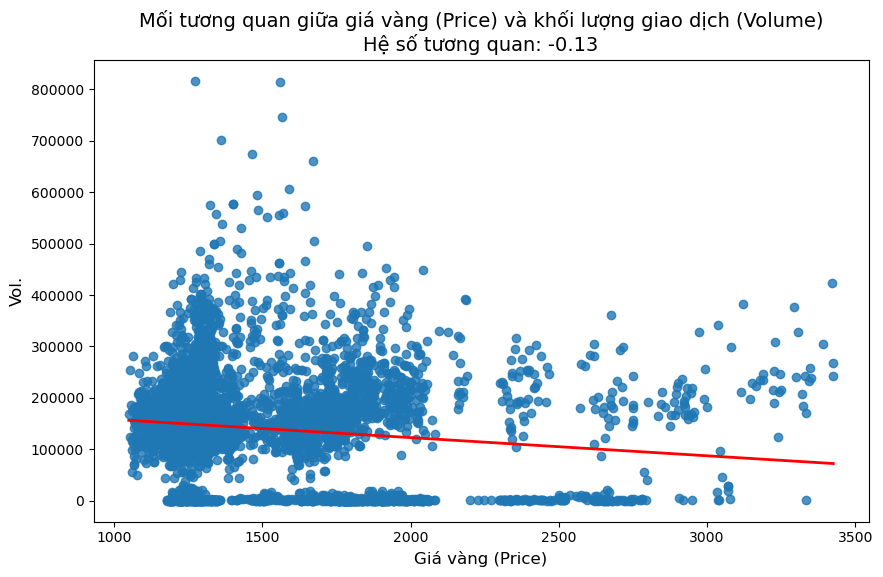

In [8]:
# Tính hệ số tương quan giữa giá vàng (Price) và Khối lượng giao dịch Volume
correlation = gld_price_data['Price'].corr(gld_price_data['Vol.'])

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.regplot(x='Price', y='Vol.', data=gld_price_data, 
            line_kws={'color': 'red', 'lw': 2},
            ci=None)  # Không hiển thị khoảng tin cậy

# Thêm tiêu đề và nhãn trục
plt.title(f'Mối tương quan giữa giá vàng (Price) và khối lượng giao dịch (Volume)\nHệ số tương quan: {correlation:.2f}', fontsize=14)
plt.xlabel('Giá vàng (Price)', fontsize=12)
plt.ylabel('Vol.', fontsize=12)

# Hiển thị biểu đồ
plt.show()